In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

### Lets Check for the null count in each column

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Segregating all the columns with the null value from both the dataframes, so that we can go through each column and delete features containing more than 50% of nulls.

In [7]:
train_nulls = train_df.columns[train_df.isnull().any()].tolist()
train_nulls_val = [train_df[i].isnull().sum() for i in train_nulls]
test_nulls = test_df.columns[test_df.isnull().any()].tolist()
test_nulls_val = [test_df[i].isnull().sum() for i in test_nulls]
null_df = pd.DataFrame({'df':["train" for i in range(len(train_nulls_val))]+["test" for i in range(len(test_nulls_val))],'column_name':train_nulls+test_nulls,'actual_column_count':["1460" for i in range(len(train_nulls_val))]+["1459" for i in range(len(test_nulls_val))],'null_value_count':train_nulls_val+test_nulls_val})
null_df

,df,column_name,actual_column_count,null_value_count
0,train,LotFrontage,1460,259
1,train,Alley,1460,1369
2,train,MasVnrType,1460,8
3,train,MasVnrArea,1460,8
4,train,BsmtQual,1460,37
5,train,BsmtCond,1460,37
6,train,BsmtExposure,1460,38
7,train,BsmtFinType1,1460,37
8,train,BsmtFinType2,1460,38
9,train,Electrical,1460,1


### When we look at the features of training dataframe(train_df) the features such as 
1. Alley
2. MasVnrType
2. FireplaceQu
3. PoolQC
4. Fence
5. MiscFeature
### Contains more null values. Similarly in the test_df:
1. Alley
2. MasVnrType
2. FireplaceQu
3. PoolQC
4. Fence
5. MiscFeature

In [8]:
train_df = train_df.drop(['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
test_df = test_df.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

## Let us fill the remaining feature's null rows with the most repeated value

In [9]:
train_df['LotFrontage'].fillna(value=train_df['LotFrontage'].mode()[0],inplace=True)
train_df['MasVnrArea'].fillna(value=train_df['MasVnrArea'].mode()[0],inplace=True)
train_df['BsmtQual'].fillna(value=train_df['BsmtQual'].mode()[0],inplace=True)
train_df['BsmtCond'].fillna(value=train_df['BsmtCond'].mode()[0],inplace=True)
train_df['BsmtExposure'].fillna(value=train_df['BsmtExposure'].mode()[0],inplace=True)
train_df['BsmtFinType1'].fillna(value=train_df['BsmtFinType1'].mode()[0],inplace=True)
train_df['BsmtFinType2'].fillna(value=train_df['BsmtFinType2'].mode()[0],inplace=True)
train_df['Electrical'].fillna(value=train_df['Electrical'].mode()[0],inplace=True)
train_df['GarageType'].fillna(value=train_df['GarageType'].mode()[0],inplace=True)
train_df['GarageYrBlt'].fillna(value=train_df['GarageYrBlt'].mode()[0],inplace=True)
train_df['GarageFinish'].fillna(value=train_df['GarageFinish'].mode()[0],inplace=True)
train_df['GarageQual'].fillna(value=train_df['GarageQual'].mode()[0],inplace=True)
train_df['GarageCond'].fillna(value=train_df['GarageCond'].mode()[0],inplace=True)

In [10]:
test_df['MSZoning'].fillna(value=test_df['MSZoning'].mode()[0],inplace=True)
test_df['LotFrontage'].fillna(value=test_df['LotFrontage'].mode()[0],inplace=True)
test_df['Utilities'].fillna(value=test_df['Utilities'].mode()[0],inplace=True)
test_df['Exterior1st'].fillna(value=test_df['Exterior1st'].mode()[0],inplace=True)
test_df['Exterior2nd'].fillna(value=test_df['Exterior2nd'].mode()[0],inplace=True)
test_df['MasVnrArea'].fillna(value=test_df['MasVnrArea'].mode()[0],inplace=True)
test_df['BsmtQual'].fillna(value=test_df['BsmtQual'].mode()[0],inplace=True)
test_df['BsmtCond'].fillna(value=test_df['BsmtCond'].mode()[0],inplace=True)
test_df['BsmtExposure'].fillna(value=test_df['BsmtExposure'].mode()[0],inplace=True)
test_df['BsmtFinType1'].fillna(value=test_df['BsmtFinType1'].mode()[0],inplace=True)
test_df['BsmtFinSF1'].fillna(value=test_df['BsmtFinSF1'].mode()[0],inplace=True)
test_df['BsmtFinType2'].fillna(value=test_df['BsmtFinType2'].mode()[0],inplace=True)
test_df['BsmtFinSF2'].fillna(value=test_df['BsmtFinSF2'].mode()[0],inplace=True)
test_df['BsmtUnfSF'].fillna(value=test_df['BsmtUnfSF'].mode()[0],inplace=True)
test_df['TotalBsmtSF'].fillna(value=test_df['TotalBsmtSF'].mode()[0],inplace=True)
test_df['BsmtFullBath'].fillna(value=test_df['BsmtFullBath'].mode()[0],inplace=True)
test_df['BsmtHalfBath'].fillna(value=test_df['BsmtHalfBath'].mode()[0],inplace=True)
test_df['KitchenQual'].fillna(value=test_df['KitchenQual'].mode()[0],inplace=True)
test_df['Functional'].fillna(value=test_df['Functional'].mode()[0],inplace=True)
test_df['GarageType'].fillna(value=test_df['GarageType'].mode()[0],inplace=True)
test_df['GarageYrBlt'].fillna(value=test_df['GarageYrBlt'].mode()[0],inplace=True)
test_df['GarageFinish'].fillna(value=test_df['GarageFinish'].mode()[0],inplace=True)
test_df['GarageCars'].fillna(value=test_df['GarageCars'].mode()[0],inplace=True)
test_df['GarageArea'].fillna(value=test_df['GarageArea'].mode()[0],inplace=True)
test_df['GarageQual'].fillna(value=test_df['GarageQual'].mode()[0],inplace=True)
test_df['GarageCond'].fillna(value=test_df['GarageCond'].mode()[0],inplace=True)
test_df['SaleType'].fillna(value=test_df['SaleType'].mode()[0],inplace=True)

### Now lets start the part of training the model

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

## Here I am converting all the object datatypes are being converted to numericals with the help of label encoder module. There is also the one hot encoding method but it is not that good when the number of features are more

In [12]:
le = LabelEncoder()
for i in train_df:
    if train_df[i].dtype == 'object':
        train_df[i] = le.fit_transform(train_df[i])
for i in test_df:
    if test_df[i].dtype == 'object':
        test_df[i] = le.fit_transform(test_df[i])

In [13]:
X = train_df.drop(['SalePrice'],axis=1)
y = train_df.SalePrice

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
lin_score = round(r2_score(y_test, lin_pred) *100, 2)

In [16]:
xg = xgboost.XGBRegressor()
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
xg_score = round(r2_score(y_test, xg_pred) *100, 2)

In [17]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_score = round(r2_score(y_test, ada_pred) *100, 2)

In [18]:
grd = GradientBoostingRegressor()
grd.fit(X_train, y_train)
grd_pred = grd.predict(X_test)
grd_score = round(r2_score(y_test, grd_pred) *100, 2)

In [19]:
rnd = RandomForestRegressor()
rnd.fit(X_train, y_train)
rnd_pred = rnd.predict(X_test)
rnd_score = round(r2_score(y_test, rnd_pred) *100, 2)

In [20]:
dec = DecisionTreeRegressor()
dec.fit(X_train, y_train)
dec_pred = dec.predict(X_test)
dec_score = round(r2_score(y_test, dec_pred) *100, 2)

In [21]:
score_df = pd.DataFrame({
    'Model':['Linear','Random Forest','Decision Tree','Gradient Boost','Adaboost','XgBoost'],
    'Score':[lin_score,rnd_score,dec_score,grd_score,ada_score,xg_score]
})
score_df

,Model,Score
0,Linear,84.62
1,Random Forest,89.60
2,Decision Tree,73.59
3,Gradient Boost,89.44
4,Adaboost,85.25
5,XgBoost,91.07


<AxesSubplot:xlabel='Model', ylabel='Score'>

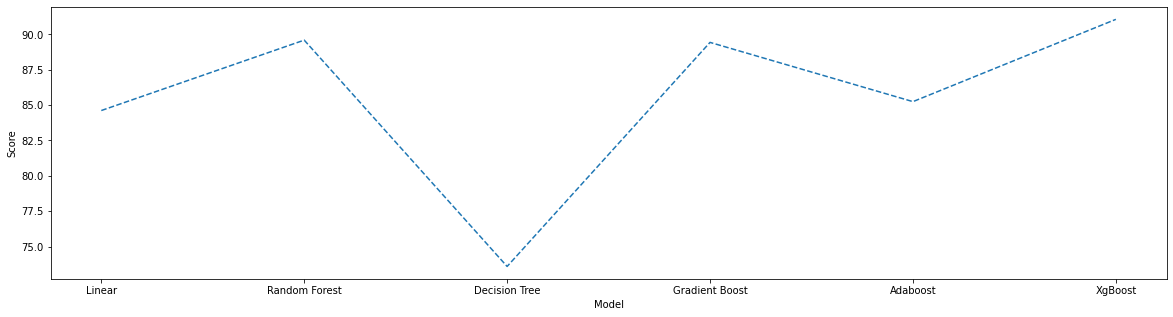

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Model',y='Score',data=score_df,linestyle="--",markers="o")

### Predicting for the values in test.csv file

#### I am using the gradient descent because my other models submission score are lesser than the gradient descent model

In [23]:
pred = grd.predict(test_df.drop(['Id'],axis=1))

In [24]:
sub_df = pd.DataFrame({
    'Id':test_df.Id,
    'SalePrice':pred
})
sub_df

,Id,SalePrice
0,1461,125393.950617
1,1462,157662.072096
2,1463,177857.527631
3,1464,186806.467872
4,1465,205179.056823
...,...,...
1454,2915,85522.873693
1455,2916,83840.038145
1456,2917,157571.064406
1457,2918,122678.356440


In [25]:
sub_df.to_csv('submission.csv',index=False)